# softmax


In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [60]:
# load datasets

data_dir = Path("data")
easy_train = pd.read_csv(data_dir / "classification" / "easy-training.csv")
easy_test = pd.read_csv(data_dir / "classification" / "easy-test.csv")
rings_train = pd.read_csv(data_dir / "classification" / "rings3-regular-training.csv")
rings_test = pd.read_csv(data_dir / "classification" / "rings3-regular-test.csv")
xor_train = pd.read_csv(data_dir / "classification" / "xor3-training.csv")
xor_test = pd.read_csv(data_dir / "classification" / "xor3-test.csv")

# easy dataset

In [3]:
easy_train

x          y      c
0   -72.829461 -40.239391  False
1   -65.464396 -60.501516  False
2    14.389589  74.223994  False
3   -92.335628  17.466916  False
4   -61.058421 -16.761820  False
..         ...        ...    ...
495  96.279863 -95.125533   True
496 -41.625338 -48.713720   True
497 -64.545443 -91.317035   True
498 -27.066599 -89.894718   True
499   6.307461 -48.341551   True

[500 rows x 3 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


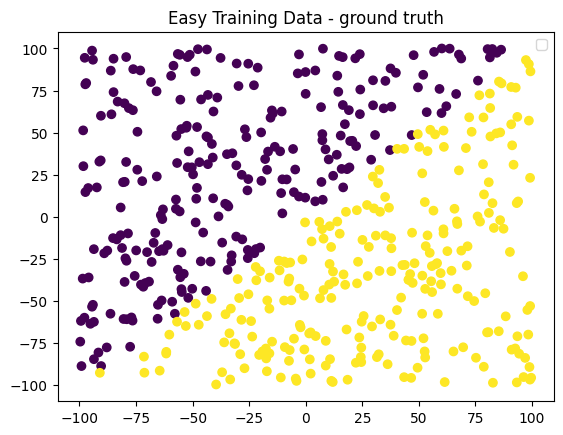

In [9]:
plt.scatter(easy_train.x, easy_train.y, c=easy_train.c)
plt.title("Easy Training Data - ground truth")
plt.legend()
plt.show()

In [5]:
layers = [
    #{"output_dim": 5, "activation": "relu", "init": "he"},
    # {"output_dim": 2, "activation": "softmax", "init": "normal"}
    {"output_dim": 1, "activation": "sigmoid", "init": "normal"}
]

mlp = networks.MLP(layers, input=easy_test[["x", "y"]].T, output_type="classification")


In [94]:
norm = networks.assets.Normalizator(easy_train[["x", "y"]])

train = norm(easy_train[["x", "y"]])
y_train = easy_train.c.values.reshape(-1, 1)
test = norm(easy_test[['x', 'y']])
y_test = easy_test.c.values.reshape(-1, 1)

In [95]:
layers = [
   # {"output_dim": 3, "activation": "relu", "init": "he"},
    {"output_dim": 1, "activation": "sigmoid", "init": "normal"}
]

mlp_no_softmax = networks.MLP(layers, input=train.T, output_type="regression")

Consider using the linear activation function for the output layer in regression problems.


In [96]:
max_epochs = 500

Epoch: 0, Loss: 0.29194047422979724
Epoch: 100, Loss: 0.12141277485999089
Epoch: 200, Loss: 0.11110088935103486
Epoch: 300, Loss: 0.11065195538847161
Epoch: 400, Loss: 0.1105828544944299


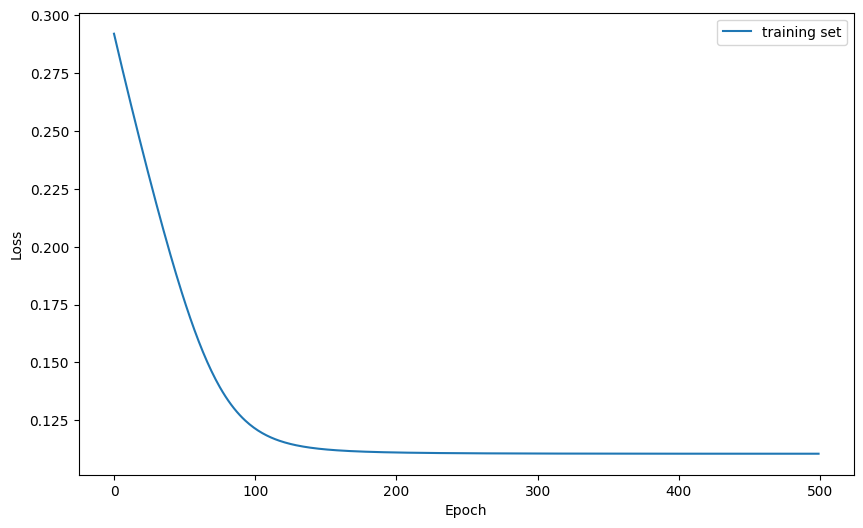

In [97]:
losses = mlp_no_softmax.train(train.T, y_train.T, max_epochs=max_epochs, learning_rate=0.01, batch_size=32)

Accuracy: 0.982


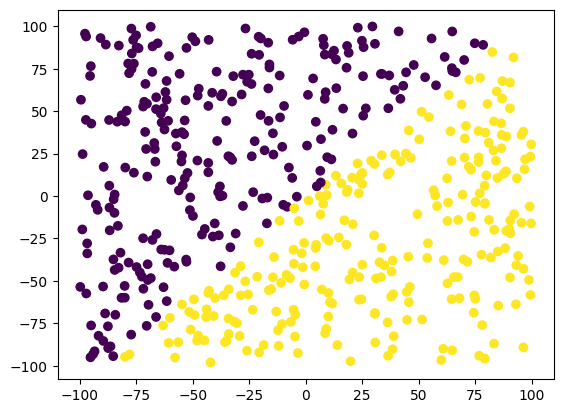

In [98]:
y_pred = mlp_no_softmax.predict(test.T) > 0.5


plt.scatter(easy_test.x, easy_test.y, c=y_pred)
print(f"Accuracy: {np.mean(y_pred.to_numpy().flatten() == y_test.flatten())}")
#print(f"Fscore on test set {mlp_no_softmax.Fscore(y_pred, y_test)}")

In [99]:
mlp_no_softmax.layers[0].activation

<function networks.activations.sigmoid(x)>

Epoch: 0, Loss: 1.0555607179557538
Epoch: 100, Loss: 0.12453068967623654
Epoch: 200, Loss: 0.09839486496547792
Epoch: 300, Loss: 0.08574913744268732
Epoch: 400, Loss: 0.07774362846060769
Epoch: 500, Loss: 0.0720292476092396
Epoch: 600, Loss: 0.06765907849366225
Epoch: 700, Loss: 0.06416307588580503
Epoch: 800, Loss: 0.06127606830751431
Epoch: 900, Loss: 0.058834810021785984
Epoch: 1000, Loss: 0.05673219785810726
Epoch: 1100, Loss: 0.05489446680033346
Epoch: 1200, Loss: 0.0532688289285618
Epoch: 1300, Loss: 0.05181631794982069
Epoch: 1400, Loss: 0.05050742310619562
Epoch: 1500, Loss: 0.04931930748793076
Epoch: 1600, Loss: 0.048233970637126686
Epoch: 1700, Loss: 0.04723699712174227
Epoch: 1800, Loss: 0.04631668145449497
Epoch: 1900, Loss: 0.045463402003811985
Epoch: 2000, Loss: 0.044669163958450414
Epoch: 2100, Loss: 0.04392725971557563
Epoch: 2200, Loss: 0.043232012492607594
Epoch: 2300, Loss: 0.04257857999941082
Epoch: 2400, Loss: 0.041962802162160966
Epoch: 2500, Loss: 0.0413810816330

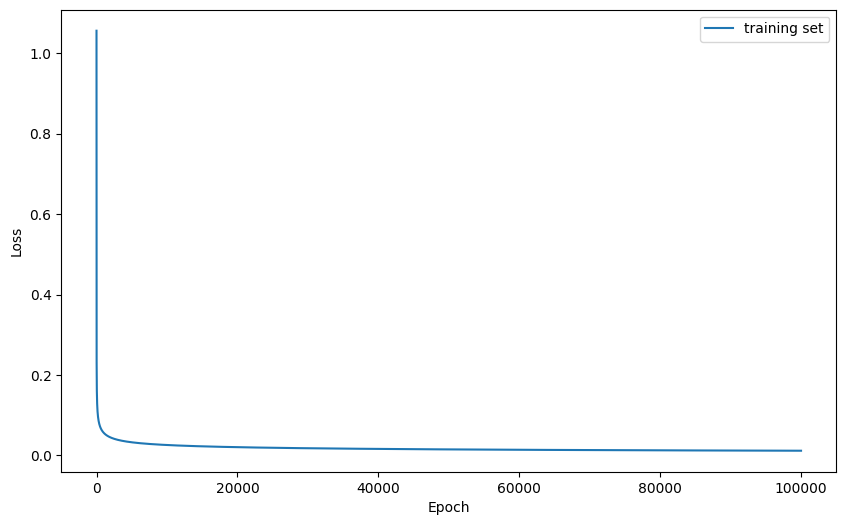

In [109]:
layers = [
    #{"output_dim": 5, "activation": "relu", "init": "he"},
    {"output_dim": 2, "activation": "softmax", "init": "normal"}
]

max_epochs = 100000

mlp = networks.MLP(layers, input=train.T, output_type="classification", regularization=None)

losses = mlp.train(train.T.to_numpy(), y_train.T, learning_rate=0.5, max_epochs=max_epochs, batch_size=1000)

loss: 0.011766952345973351


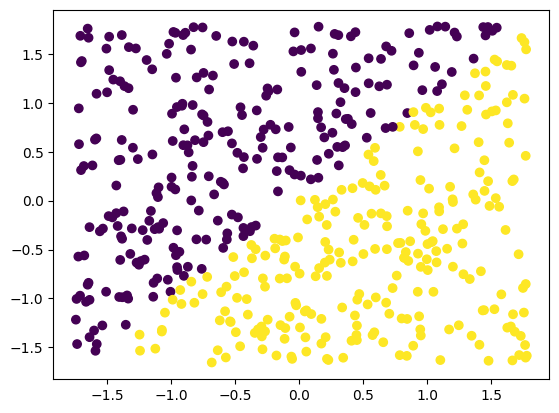

In [110]:
y_hat = mlp.predict(train.T)
print("loss:", mlp.calculate_loss(train.T, y_train.T))

plt.scatter(train.x, train.y, c=y_hat)

In [111]:
y_pred = mlp.full_forward_pass(test.T)
y_test_onehot = networks.assets.one_hot(y_test.T, 2)

print("Fscore on test set:", mlp.Fscore(y_pred, y_test_onehot))


Fscore on test set: 0.9903411499970268


In [113]:
y_pred_train = mlp.full_forward_pass(train.T)
y_train_onehot = networks.assets.one_hot(y_train.T, 2)

print("Fscore on train set:", mlp.Fscore(y_pred_train, y_train_onehot))

Fscore on train set: 0.9900847808492892


## rings3 

In [41]:
rings_train.c.value_counts()

c
0    500
1    500
2    500
Name: count, dtype: int64

In [42]:
rings_train

x          y  c
0    -93.563317 -76.345110  0
1      1.060114 -16.727040  0
2     24.396099  40.358822  0
3    -94.595137 -97.889250  0
4    -85.331382 -56.736933  0
...         ...        ... ..
1495  -3.227585 -69.846357  2
1496 -82.598085 -51.758017  2
1497 -46.601078 -21.654871  2
1498 -59.106450 -44.528442  2
1499 -45.502025 -30.420834  2

[1500 rows x 3 columns]

In [118]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 3, "activation": "softmax", "init": "normal"}
]


norm = networks.assets.Normalizator(rings_train[["x", "y"]])

train = norm(rings_train[["x", "y"]])
y_train = rings_train.c.values.reshape(-1, 1)
test = norm(rings_test[['x', 'y']])
y_test = rings_test.c.values.reshape(-1, 1)

In [119]:
rings_train.shape

(1500, 3)

Epoch: 0, Loss: 1.3954022843087635
Epoch: 100, Loss: 0.46260515854457945
Epoch: 200, Loss: 0.4068289690914452
Epoch: 300, Loss: 0.3826859018931732
Epoch: 400, Loss: 0.3749336953820535
Epoch: 500, Loss: 0.36693223548866977
Epoch: 600, Loss: 0.36396756095361366
Epoch: 700, Loss: 0.36022717585798486
Epoch: 800, Loss: 0.3596032331378048
Epoch: 900, Loss: 0.36188390271839566
Epoch: 1000, Loss: 0.36463701647683494
Epoch: 1100, Loss: 0.3645294735038809
Epoch: 1200, Loss: 0.3629031006852388
Epoch: 1300, Loss: 0.36361918718453184
Epoch: 1400, Loss: 0.3651161913443866
Epoch: 1500, Loss: 0.3632656234492899
Epoch: 1600, Loss: 0.36304013497228177
Epoch: 1700, Loss: 0.3604479818726661
Epoch: 1800, Loss: 0.3547682092588764
Epoch: 1900, Loss: 0.34957395383320244
Epoch: 2000, Loss: 0.34128370529132696
Epoch: 2100, Loss: 0.33924842318618764
Epoch: 2200, Loss: 0.3406108815729476
Epoch: 2300, Loss: 0.3382849254358294
Epoch: 2400, Loss: 0.33543141303976276
Epoch: 2500, Loss: 0.33327369682741353
Epoch: 2600

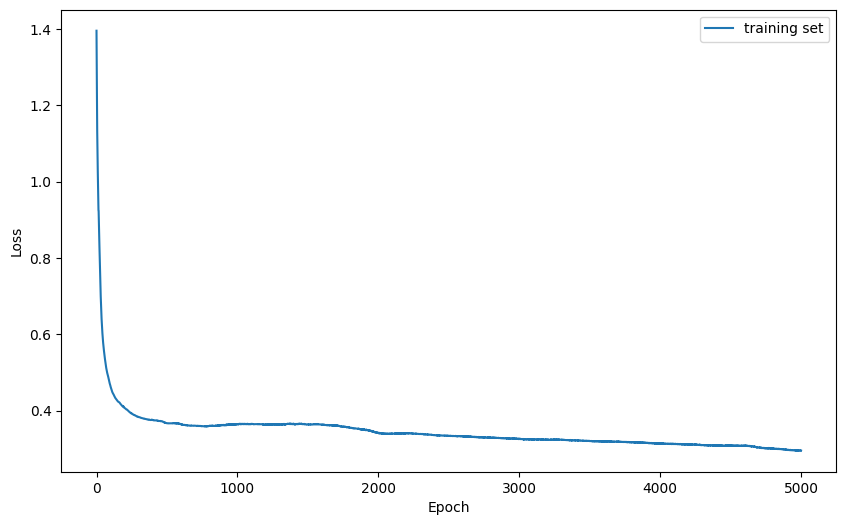

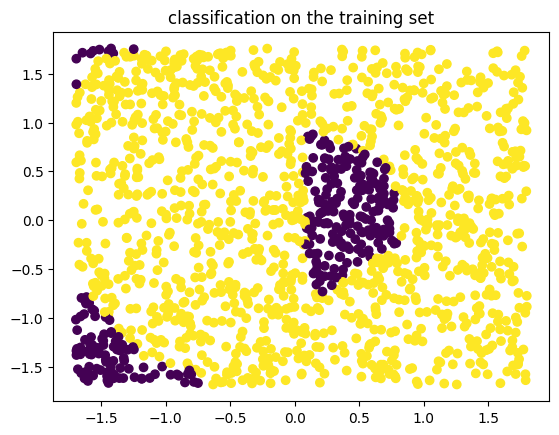

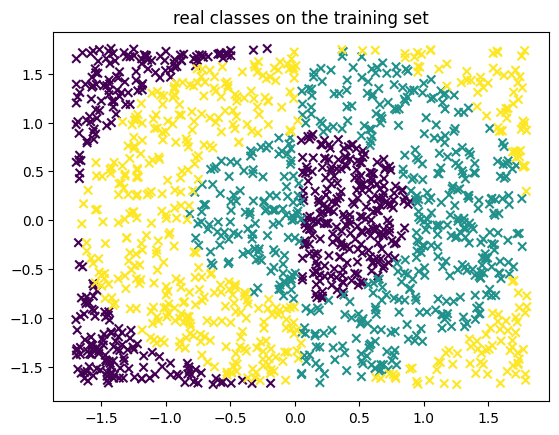

In [120]:
layers_mse = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 1, "activation": "linear", "init": "normal"}
]


mlp_mse = networks.MLP(layers_mse, input=train.T, output_type="regression", regularization=None)
max_epochs = 5000

losses = mlp_mse.train(train.T, y_train.T, max_epochs=max_epochs, learning_rate=0.01, batch_size=32)



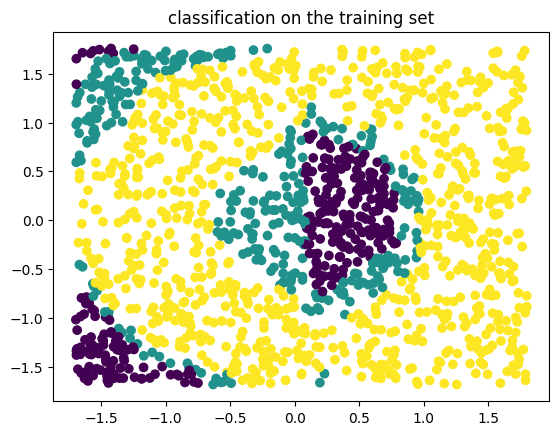

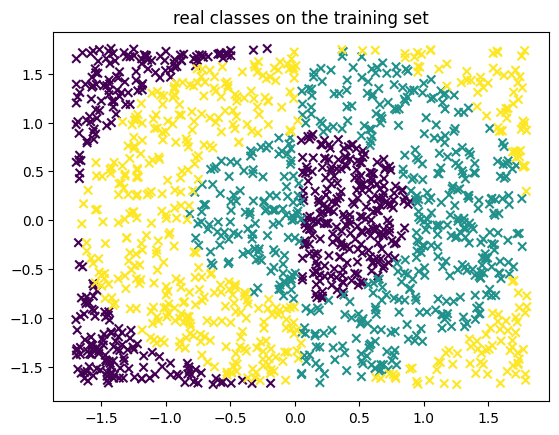

In [123]:

y_hat = round(mlp_mse.predict(train.T))
y_hat[y_hat == 3] = 2
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set with MSE loss")
plt.show()

plt.scatter(train.x, train.y, c=rings_train.c, marker="x")
plt.title("real classes on the training set")
plt.show()

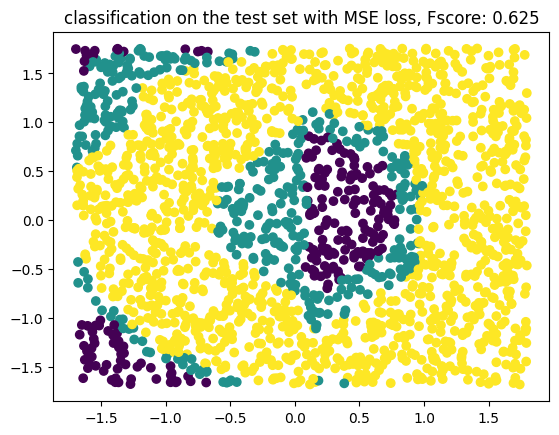

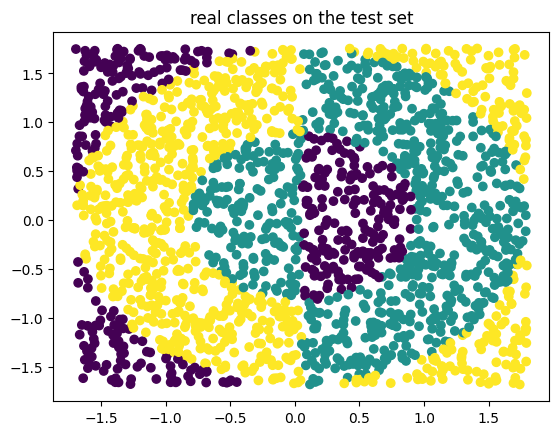

In [135]:
y_hat = np.rint(mlp_mse.predict(test.T.to_numpy()))
y_hat[y_hat == 3] = 2
plt.scatter(test.x, test.y, c=y_hat)
plt.title("classification on the test set with MSE loss, Fscore: 0.625")
plt.show()

plt.scatter(test.x, test.y, c=rings_test.c)
plt.title("real classes on the test set")
plt.show()


In [130]:
y_hat

array([[2., 2., 2., ..., 2., 0., 2.]])

In [ ]:
mlp_steps = networks.MLP(layers, input=train.T.to_numpy(), output_type="classification")

In [133]:

y_onehot_hat = networks.assets.one_hot(y_hat, 3)
y_test_onehot = networks.assets.one_hot(y_test.T, 3)

print("Fscore on test set:", mlp_steps.Fscore(y_onehot_hat, y_test_onehot))

Fscore on test set: 0.6025


Epoch: 0, Loss: 1.9905347098767345
Epoch: 100, Loss: 0.9173067222719418
Epoch: 200, Loss: 0.857360079495886
Epoch: 300, Loss: 0.8046444871632241
Epoch: 400, Loss: 0.7406715159052992
Epoch: 500, Loss: 0.6675050299334571
Epoch: 600, Loss: 0.6099591159098644
Epoch: 700, Loss: 0.5567776220087355
Epoch: 800, Loss: 0.4902763315027552
Epoch: 900, Loss: 0.4350052459417763
Epoch: 1000, Loss: 0.3784919918109011
Epoch: 1100, Loss: 0.3413216909034903
Epoch: 1200, Loss: 0.3102657663976907
Epoch: 1300, Loss: 0.283310515798504
Epoch: 1400, Loss: 0.2630176161700693
Epoch: 1500, Loss: 0.24718950623055078
Epoch: 1600, Loss: 0.2343452626254342
Epoch: 1700, Loss: 0.2234365480230862
Epoch: 1800, Loss: 0.21413144247470853
Epoch: 1900, Loss: 0.20544160472826659
Epoch: 2000, Loss: 0.19803908442909046
Epoch: 2100, Loss: 0.19144292091407117
Epoch: 2200, Loss: 0.18519865372867064
Epoch: 2300, Loss: 0.17885661250960214
Epoch: 2400, Loss: 0.173130046135638
Epoch: 2500, Loss: 0.1684066478620578
Epoch: 2600, Loss: 0

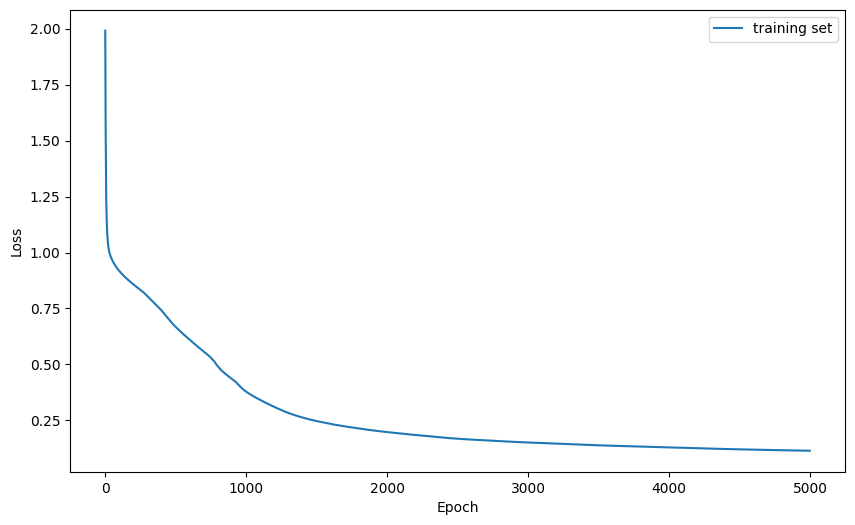

In [136]:
mlp_steps = networks.MLP(layers, input=train.T.to_numpy(), output_type="classification", regularization=None)

max_epochs = 5000

losses = mlp_steps.train(train.T.to_numpy(), y_train.T, learning_rate=0.001, max_epochs=max_epochs, batch_size=32)

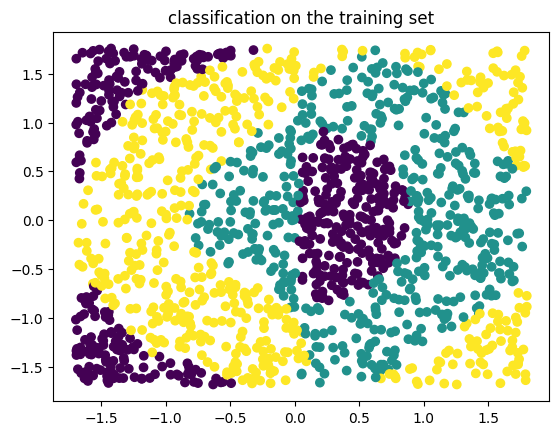

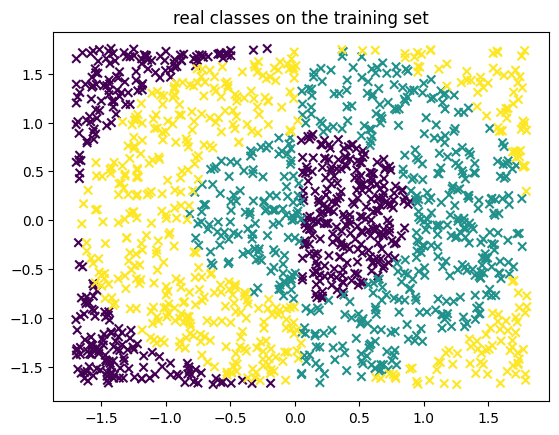

In [137]:
y_hat = mlp_steps.predict(train.T)
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set")
plt.show()

plt.scatter(train.x, train.y, c=rings_train.c, marker="x")

plt.title("real classes on the training set")
plt.show()

In [138]:
y_pred = mlp_steps.full_forward_pass(test.T)
print(y_pred.shape)
y_onehot = networks.assets.one_hot(y_test.T, 3)
print("Fscore on test set:", mlp_steps.Fscore(y_pred, y_onehot))

(3, 2000)
Fscore on test set: 0.9008927990625705


In [141]:
y_train_pred = mlp_steps.full_forward_pass(train.T)
y_train_onehot = networks.assets.one_hot(y_train.T, 3)
print("Fscore on train set:", mlp_steps.Fscore(y_train_pred, y_train_onehot))

Fscore on train set: 0.9173458566785675


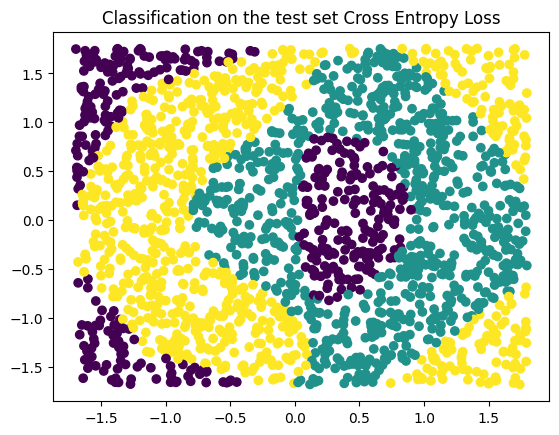

Text(0.5, 1.0, 'real classes on the test set')

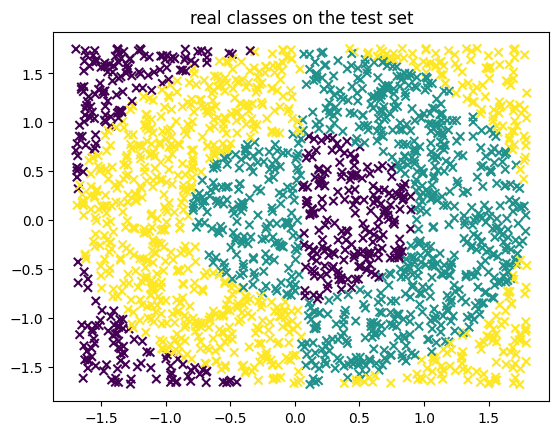

In [140]:


y_pred = mlp_steps.predict(test.T).flatten()
plt.scatter(test.x, test.y, c=y_pred)
plt.title("Classification on the test set Cross Entropy Loss")
plt.show()

plt.scatter(test.x, test.y, c=rings_test.c, marker="x")
plt.title("real classes on the test set")


# XOR

In [61]:
xor_train

x          y  c
0    -5.720316  18.198653  0
1    50.039419 -71.390360  0
2    93.072781 -76.340256  0
3    10.434100 -21.863272  0
4    30.198218 -24.730234  0
..         ...        ... ..
495 -88.821359  14.624647  1
496  57.830467  12.097832  1
497 -31.530983  90.372797  1
498 -17.008097  65.769246  1
499  64.991107 -21.539987  1

[500 rows x 3 columns]

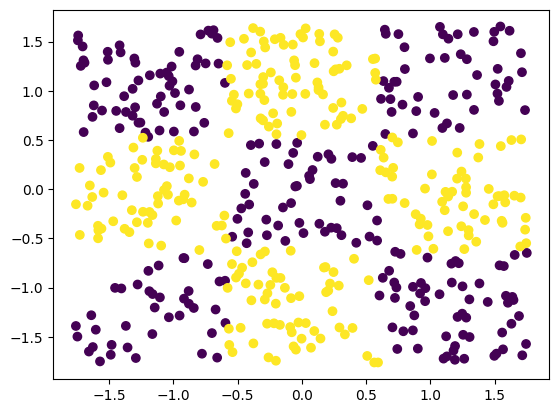

In [57]:

norm = networks.assets.Normalizator(xor_train[["x", "y"]])

train = norm(xor_train[["x", "y"]])
y_train = xor_train.c.values.reshape(-1, 1)
test = norm(xor_test[['x', 'y']])
y_test = xor_test.c.values.reshape(-1, 1)

plt.scatter(train["x"], train["y"], c=y_train)

In [59]:
print("train shape", train.shape)
print("test shape", test.shape)

train shape (500, 2)
test shape (500, 2)


Epoch: 0, Loss: 0.72647335328423
Epoch: 100, Loss: 0.544098738543236
Epoch: 200, Loss: 0.47113794171993006
Epoch: 300, Loss: 0.4084119439342005
Epoch: 400, Loss: 0.34106696485683735
Epoch: 500, Loss: 0.28004883297234046
Epoch: 600, Loss: 0.22818724159354517
Epoch: 700, Loss: 0.1798812108017698
Epoch: 800, Loss: 0.1426608169902157
Epoch: 900, Loss: 0.11910446660054962
Epoch: 1000, Loss: 0.1046132795510636
Epoch: 1100, Loss: 0.0950304523439761
Epoch: 1200, Loss: 0.08814417730033337
Epoch: 1300, Loss: 0.08282782663769271
Epoch: 1400, Loss: 0.0785893596447017
Epoch: 1500, Loss: 0.07507662019902456
Epoch: 1600, Loss: 0.07210417815781962
Epoch: 1700, Loss: 0.06957156813717712
Epoch: 1800, Loss: 0.06734843113148048
Epoch: 1900, Loss: 0.06538769091738016
Epoch: 2000, Loss: 0.06366142436388197
Epoch: 2100, Loss: 0.062092695257190314
Epoch: 2200, Loss: 0.06068332823870264
Epoch: 2300, Loss: 0.05944911175809318
Epoch: 2400, Loss: 0.05825339469533268
Epoch: 2500, Loss: 0.0571770965325376
Epoch: 26

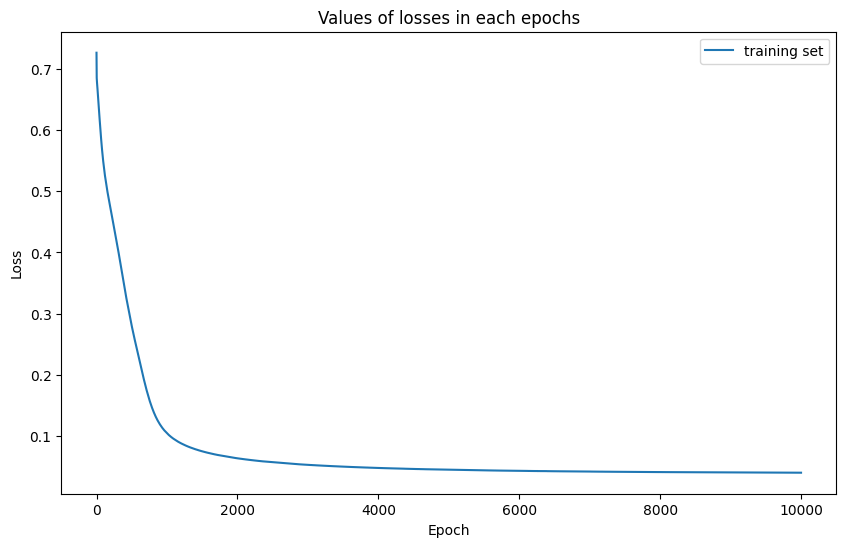

In [41]:
layers = [
    {"output_dim": 10, "activation": "tanh", "init": "xavier"},
    {"output_dim": 10, "activation": "tanh", "init": "xavier"},
    {"output_dim": 2, "activation": "softmax", "init": "normal"}
]

max_epochs = 10000

mlp_xor = networks.MLP(layers, input=train.T, output_type="classification", regularization="l2", regularization_alpha=0.0001)


losses = mlp_xor.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=32, learning_rate=0.01, stochastic_descent=True)

Epoch: 0, Loss: 0.04011619923404046
Epoch: 100, Loss: 0.04007176838660817
Epoch: 200, Loss: 0.040061223164980925
Epoch: 300, Loss: 0.04004079686904478
Epoch: 400, Loss: 0.04001662397158625
Epoch: 500, Loss: 0.039998583925861905
Epoch: 600, Loss: 0.03998427857784687
Epoch: 700, Loss: 0.039962268066391894
Epoch: 800, Loss: 0.03995122731115235
Epoch: 900, Loss: 0.039939905581340425
Epoch: 1000, Loss: 0.03991160770293534
Epoch: 1100, Loss: 0.039896077087956665
Epoch: 1200, Loss: 0.039875254047718106
Epoch: 1300, Loss: 0.039861751696475566
Epoch: 1400, Loss: 0.03984464046238443
Epoch: 1500, Loss: 0.039826688809074896
Epoch: 1600, Loss: 0.03981185132305171
Epoch: 1700, Loss: 0.03979891124567751
Epoch: 1800, Loss: 0.03978011942866794
Epoch: 1900, Loss: 0.03977142909705153
Epoch: 2000, Loss: 0.03974966227115931
Epoch: 2100, Loss: 0.03973395944586629
Epoch: 2200, Loss: 0.03972009643404851
Epoch: 2300, Loss: 0.03971086136488793
Epoch: 2400, Loss: 0.03970464220694096
Epoch: 2500, Loss: 0.03967661

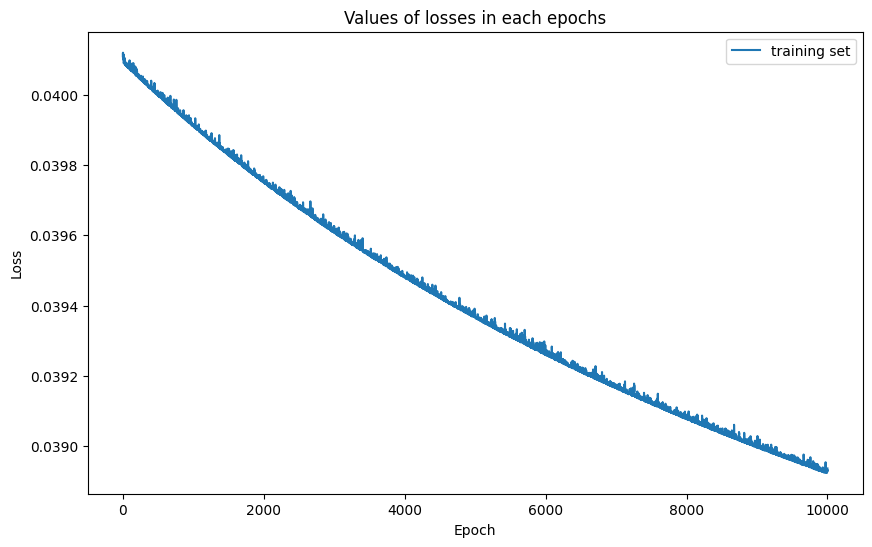

In [42]:
losses = mlp_xor.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=32, learning_rate=0.005, stochastic_descent=True)

Epoch: 0, Loss: 0.03892657003435132
Epoch: 100, Loss: 0.038942525216229165
Epoch: 200, Loss: 0.038936397775400776
Epoch: 300, Loss: 0.03892957577703139
Epoch: 400, Loss: 0.03892264357076238
Epoch: 500, Loss: 0.03891571348169706
Epoch: 600, Loss: 0.03890881579282727
Epoch: 700, Loss: 0.038901960084106124
Epoch: 800, Loss: 0.03889514972324468
Epoch: 900, Loss: 0.038888385944950754
Epoch: 1000, Loss: 0.03888166915492457
Epoch: 1100, Loss: 0.03887499939445187
Epoch: 1200, Loss: 0.03886837652280116
Epoch: 1300, Loss: 0.03886180029612578
Epoch: 1400, Loss: 0.038855270405507125
Epoch: 1500, Loss: 0.03884878649766111
Epoch: 1600, Loss: 0.038842348187645266
Epoch: 1700, Loss: 0.03883595506747298
Epoch: 1800, Loss: 0.038829606712375286
Epoch: 1900, Loss: 0.038823302685552306
Epoch: 2000, Loss: 0.03881704254186526
Epoch: 2100, Loss: 0.03881082583074261
Epoch: 2200, Loss: 0.03880465209848115
Epoch: 2300, Loss: 0.03879852089007319
Epoch: 2400, Loss: 0.03879243175065818
Epoch: 2500, Loss: 0.03878638

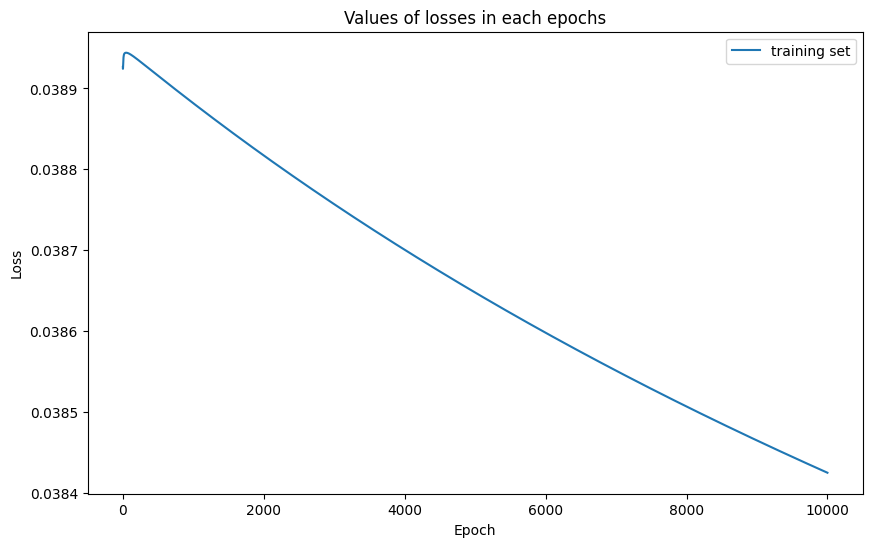

In [43]:
losses = mlp_xor.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=64, learning_rate=0.01, stochastic_descent=False)

Epoch: 0, Loss: 0.03842452596022831
Epoch: 100, Loss: 0.03842064486305383
Epoch: 200, Loss: 0.038416782958160554
Epoch: 300, Loss: 0.03841294007750877
Epoch: 400, Loss: 0.0384091160551023
Epoch: 500, Loss: 0.03840531072695806
Epoch: 600, Loss: 0.03840152393107629
Epoch: 700, Loss: 0.038397755507411424
Epoch: 800, Loss: 0.03839400529784298
Epoch: 900, Loss: 0.03839027314614744
Epoch: 1000, Loss: 0.03838655889797025
Epoch: 1100, Loss: 0.03838286240079863
Epoch: 1200, Loss: 0.0383791835039345
Epoch: 1300, Loss: 0.038375522058467934
Epoch: 1400, Loss: 0.03837187791725129
Epoch: 1500, Loss: 0.03836825093487349
Epoch: 1600, Loss: 0.03836464096763492
Epoch: 1700, Loss: 0.03836104787352253
Epoch: 1800, Loss: 0.03835747151218561
Epoch: 1900, Loss: 0.03835391174491175
Epoch: 2000, Loss: 0.038350368434603405
Epoch: 2100, Loss: 0.03834684144575454
Epoch: 2200, Loss: 0.03834333064442797
Epoch: 2300, Loss: 0.03833983589823295
Epoch: 2400, Loss: 0.03833635707630299
Epoch: 2500, Loss: 0.03833289404927

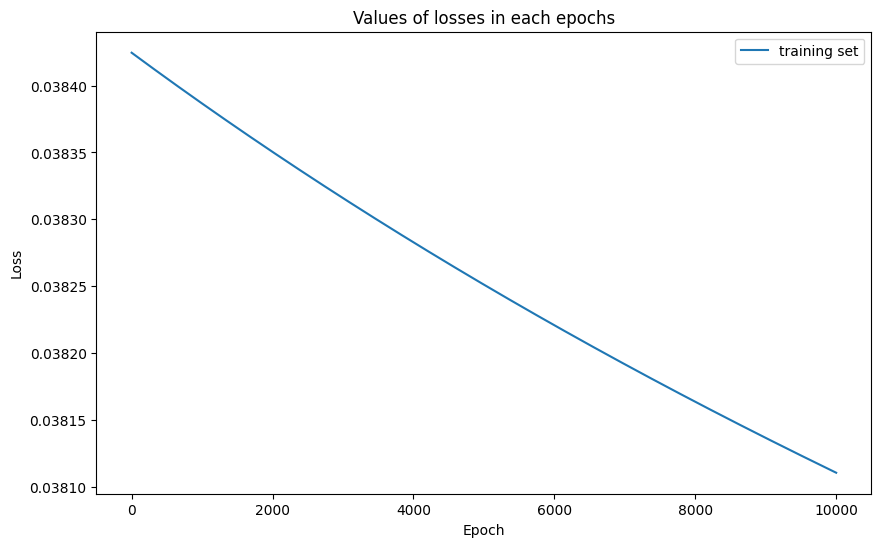

In [44]:
losses = mlp_xor.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=64, learning_rate=0.01, stochastic_descent=False)

Epoch: 0, Loss: 0.038110463198112884
Epoch: 100, Loss: 0.038107910707634085
Epoch: 200, Loss: 0.03810536728483191
Epoch: 300, Loss: 0.03810283287205702
Epoch: 400, Loss: 0.03810030741219143
Epoch: 500, Loss: 0.038097790848642135
Epoch: 600, Loss: 0.038095283125335
Epoch: 700, Loss: 0.03809278418670836
Epoch: 800, Loss: 0.03809029397770727
Epoch: 900, Loss: 0.03808781244377717
Epoch: 1000, Loss: 0.03808533953085832
Epoch: 1100, Loss: 0.03808287518537973
Epoch: 1200, Loss: 0.03808041935425354
Epoch: 1300, Loss: 0.038077971984869306
Epoch: 1400, Loss: 0.03807553302508865
Epoch: 1500, Loss: 0.03807310242323936
Epoch: 1600, Loss: 0.03807068012811034
Epoch: 1700, Loss: 0.03806826608894614
Epoch: 1800, Loss: 0.03806586025544158
Epoch: 1900, Loss: 0.03806346257773682
Epoch: 2000, Loss: 0.038061073006412004
Epoch: 2100, Loss: 0.03805869149248231
Epoch: 2200, Loss: 0.03805631798739299
Epoch: 2300, Loss: 0.03805395244301445
Epoch: 2400, Loss: 0.03805159481163743
Epoch: 2500, Loss: 0.0380492450459

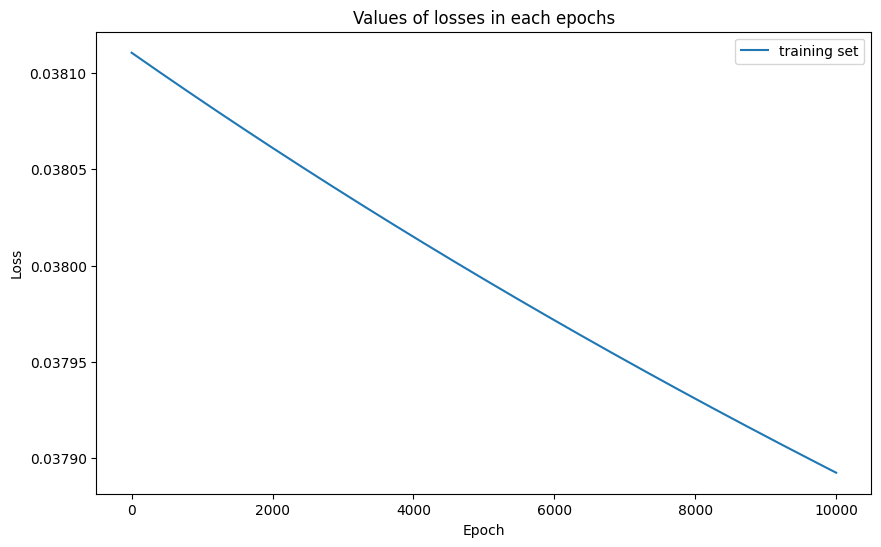

In [46]:
losses = mlp_xor.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=64, learning_rate=0.01, stochastic_descent=False)

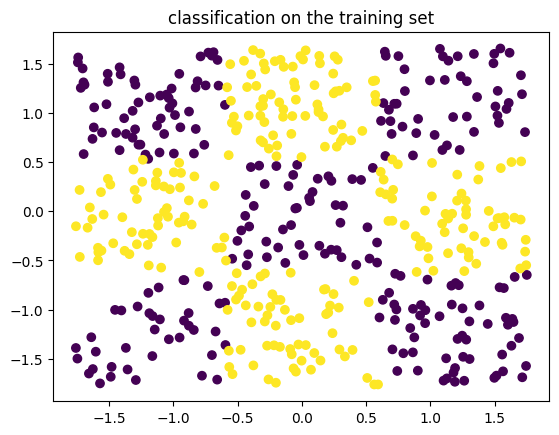

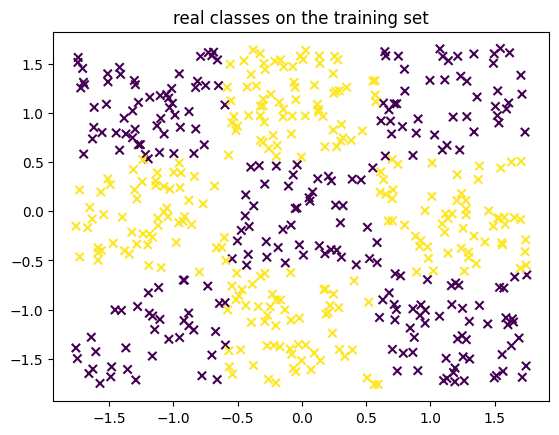

In [37]:
y_hat = mlp_xor.predict(train.T)
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set")
plt.show()

plt.scatter(train.x, train.y, c=y_train, marker="x")
plt.title("real classes on the training set")
plt.show()

0

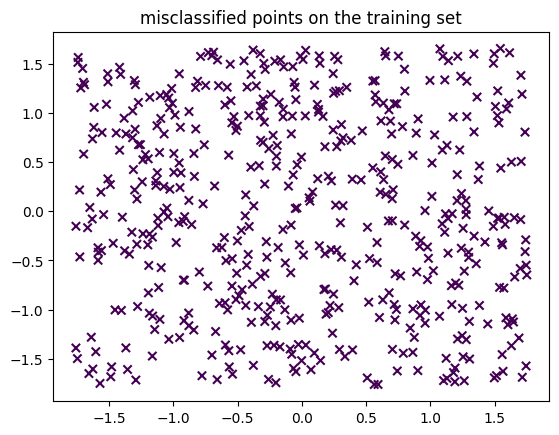

In [38]:
plt.title("misclassified points on the training set")

plt.scatter(train.x, train.y, c=y_hat.flatten() == y_train.flatten(), marker="x")
np.sum(y_hat.flatten() != y_train.flatten())

In [47]:
y_pred = mlp_xor.full_forward_pass(test.T)
print(y_pred.shape)
y_onehot = networks.assets.one_hot(y_test.T, 2)
print("Fscore on test set:", mlp_xor.Fscore(y_pred, y_onehot))

(2, 500)
Fscore on test set: 0.9566125592580162


In [149]:
y_train_pred = mlp_xor.full_forward_pass(train.T)
y_train_onehot = networks.assets.one_hot(y_train.T, 2)
print("Fscore on train set:", mlp_xor.Fscore(y_train_pred, y_train_onehot))

Fscore on train set: 0.9868160348638559


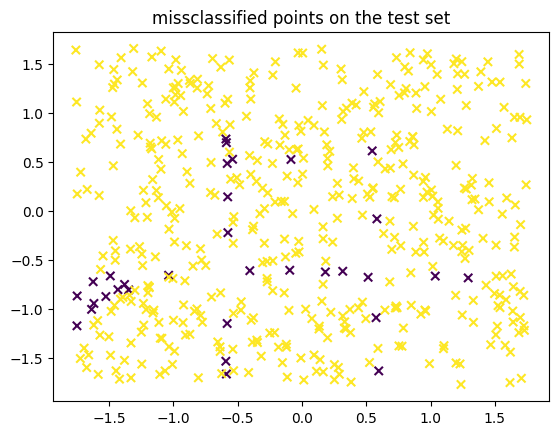

In [15]:
y_pred = mlp_xor.predict(test.T).flatten()
y_test = y_test.flatten()

plt.title("missclassified points on the test set")
plt.scatter(test.x, test.y, c=y_pred == y_test, marker="x")

In [51]:
xor_test.shape

(500, 3)

In [52]:
xor_train.shape

(500, 3)

In [82]:
joined_data.shape

(1000, 3)

In [108]:
joined_data = pd.concat([xor_train, xor_test])

from sklearn.model_selection import train_test_split

xor_train2, xor_test2 = train_test_split(joined_data, test_size=0.2, random_state=42)

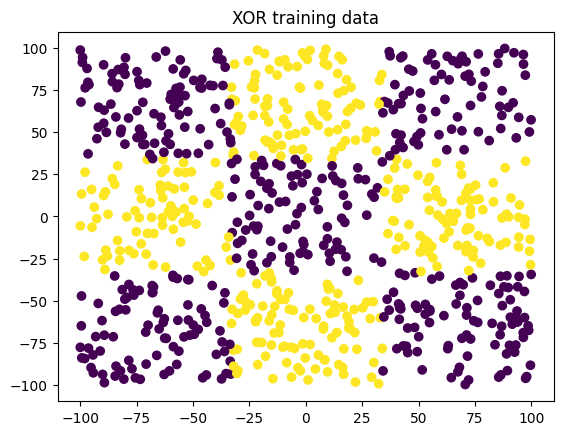

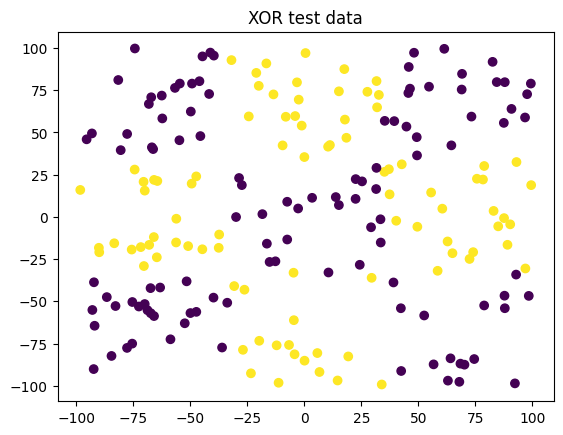

In [109]:
plt.scatter(xor_train2.x, xor_train2.y, c=xor_train2.c)
plt.title("XOR training data")
plt.show()
plt.scatter(xor_test2.x, xor_test2.y, c=xor_test2.c)
plt.title("XOR test data")
plt.show()

In [110]:
xor_test2.shape

(200, 3)

In [111]:
xor_train2.shape

(800, 3)

Epoch: 0, Loss: 0.662970596726681


Epoch: 100, Loss: 0.12588501823922496
Epoch: 200, Loss: 0.10325419766911284
Epoch: 300, Loss: 0.09205020257237202
Epoch: 400, Loss: 0.07689972019938271
Epoch: 500, Loss: 0.07156376792291798
Epoch: 600, Loss: 0.06622921646985794
Epoch: 700, Loss: 0.07504178812574536
Epoch: 800, Loss: 0.07690685275285547
Epoch: 900, Loss: 0.06312090278566788
Epoch: 1000, Loss: 0.06329445939845277
Epoch: 1100, Loss: 0.05936393353939831
Epoch: 1200, Loss: 0.0649759491288284
Epoch: 1300, Loss: 0.0714190798847524
Epoch: 1400, Loss: 0.05955360667725494
Epoch: 1500, Loss: 0.06096650070697323
Epoch: 1600, Loss: 0.05951876453901243
Epoch: 1700, Loss: 0.05588497643865334
Epoch: 1800, Loss: 0.06123152599786055
Epoch: 1900, Loss: 0.061610153474492196
Epoch: 2000, Loss: 0.06285996093564908
Epoch: 2100, Loss: 0.060579836897209915
Epoch: 2200, Loss: 0.05817963523501228
Epoch: 2300, Loss: 0.06053675247931362
Epoch: 2400, Loss: 0.06207482698472927
Epoch: 2500, Loss: 0.05966839894605143
Epoch: 2600, Loss: 0.0578346189888

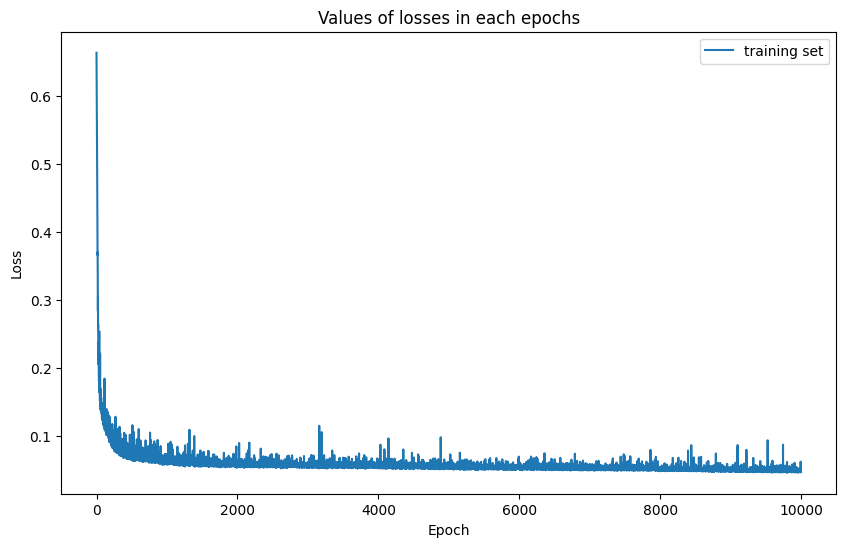

Epoch: 0, Loss: 0.04660054435454781
Epoch: 100, Loss: 0.04660035694646441
Epoch: 200, Loss: 0.0466395314842751
Epoch: 300, Loss: 0.04665090478042339
Epoch: 400, Loss: 0.046654781774392265
Epoch: 500, Loss: 0.04665544497461252
Epoch: 600, Loss: 0.0466539805606925
Epoch: 700, Loss: 0.0466506771572678
Epoch: 800, Loss: 0.04664561983094045
Epoch: 900, Loss: 0.04663887201320796
Epoch: 1000, Loss: 0.046630525301610784
Epoch: 1100, Loss: 0.04662070264295693
Epoch: 1200, Loss: 0.046609547885872425
Epoch: 1300, Loss: 0.04659721440474719
Epoch: 1400, Loss: 0.04658385683024548
Epoch: 1500, Loss: 0.04656962638649331
Epoch: 1600, Loss: 0.04655466909308279
Epoch: 1700, Loss: 0.04653912580517475
Epoch: 1800, Loss: 0.04652313313493459
Epoch: 1900, Loss: 0.04650682447775863
Epoch: 2000, Loss: 0.04649033057600544
Epoch: 2100, Loss: 0.046473779274112746
Epoch: 2200, Loss: 0.04645729434868864
Epoch: 2300, Loss: 0.04644099352188852
Epoch: 2400, Loss: 0.046424985956742625
Epoch: 2500, Loss: 0.04640936965252

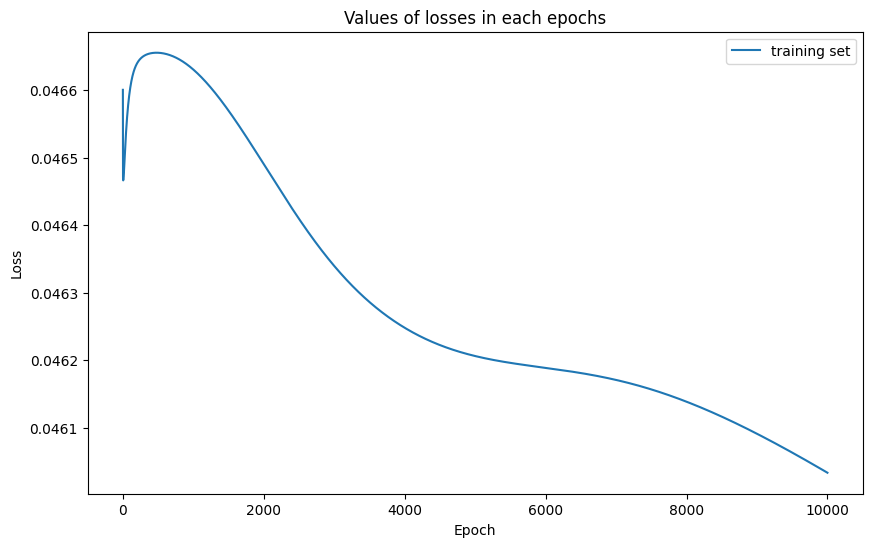

Epoch: 0, Loss: 0.04322054549204954
Epoch: 100, Loss: 0.04231225990515073
Epoch: 200, Loss: 0.04221908607692668
Epoch: 300, Loss: 0.042163290855213004
Epoch: 400, Loss: 0.04212141759667594
Epoch: 500, Loss: 0.042087455796343855
Epoch: 600, Loss: 0.04205884342913385
Epoch: 700, Loss: 0.04203416821958432
Epoch: 800, Loss: 0.042012538432705124
Epoch: 900, Loss: 0.04199334228114417
Epoch: 1000, Loss: 0.041976135666985576
Epoch: 1100, Loss: 0.041960583053590135
Epoch: 1200, Loss: 0.041946423478184794
Epoch: 1300, Loss: 0.04193344958376809
Epoch: 1400, Loss: 0.041921493899590184
Epoch: 1500, Loss: 0.04191041942062208
Epoch: 1600, Loss: 0.04190011288295009
Epoch: 1700, Loss: 0.0418904798137013
Epoch: 1800, Loss: 0.041881440798059125
Epoch: 1900, Loss: 0.04187292861012129
Epoch: 2000, Loss: 0.041864885974335284
Epoch: 2100, Loss: 0.041857263797827775
Epoch: 2200, Loss: 0.041850019760885336
Epoch: 2300, Loss: 0.04184311718387557
Epoch: 2400, Loss: 0.04183652411008707
Epoch: 2500, Loss: 0.041830

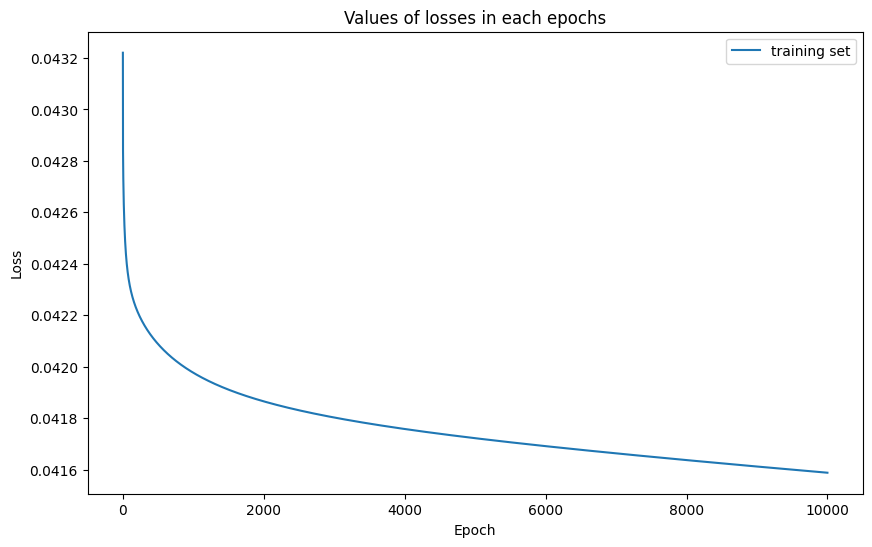

Epoch: 0, Loss: 0.04133643636108883
Epoch: 100, Loss: 0.04118906294353539
Epoch: 200, Loss: 0.04117831774284279
Epoch: 300, Loss: 0.041172225871991645
Epoch: 400, Loss: 0.04116785253036419
Epoch: 500, Loss: 0.04116430740517619
Epoch: 600, Loss: 0.04116123118206406
Epoch: 700, Loss: 0.04115845287320026
Epoch: 800, Loss: 0.04115588102331941
Epoch: 900, Loss: 0.041153461942213455
Epoch: 1000, Loss: 0.04115116163796793
Epoch: 1100, Loss: 0.04114895725411079
Epoch: 1200, Loss: 0.04114683266921218
Epoch: 1300, Loss: 0.04114477606496396
Epoch: 1400, Loss: 0.04114277849563398
Epoch: 1500, Loss: 0.041140833002545944
Epoch: 1600, Loss: 0.04113893404315935
Epoch: 1700, Loss: 0.041137077110722745
Epoch: 1800, Loss: 0.04113525847389781
Epoch: 1900, Loss: 0.04113347499426012
Epoch: 2000, Loss: 0.04113172399564136
Epoch: 2100, Loss: 0.04113000316873001
Epoch: 2200, Loss: 0.04112831050011949
Epoch: 2300, Loss: 0.04112664421860964
Epoch: 2400, Loss: 0.04112500275389268
Epoch: 2500, Loss: 0.041123384704

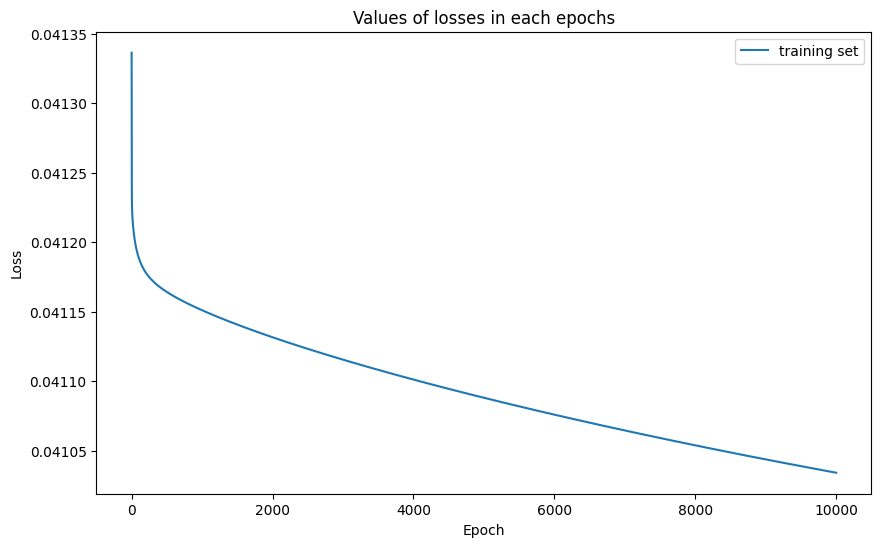

In [112]:
mlp = networks.MLP(layers, input=xor_train2[["x", "y"]].T, output_type="classification", regularization="l2", regularization_alpha=0.0001)

norm = networks.assets.Normalizator(xor_train2[["x", "y"]])
test = norm(xor_test2[['x', 'y']])
train = norm(xor_train2[["x", "y"]])

y_train = xor_train2.c.values.reshape(-1, 1)
y_test = xor_test2.c.values.reshape(-1, 1)

max_epochs = 10000
losses = mlp.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=32, learning_rate=0.1, stochastic_descent=True)
losses = mlp.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=32, learning_rate=0.05, stochastic_descent=False)
losses = mlp.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=32, learning_rate=0.02, stochastic_descent=False)
losses = mlp.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=32, learning_rate=0.01, stochastic_descent=False)


Text(0.5, 1.0, 'classification on the training set')

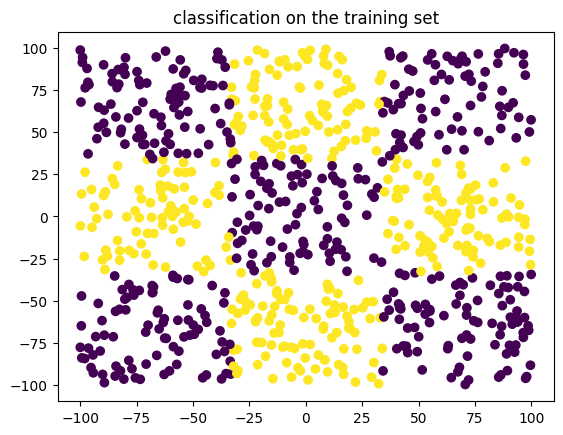

In [113]:
plt.scatter(xor_train2.x, xor_train2.y, c=mlp.predict(train.T))
plt.title("classification on the training set")

In [114]:
# Fscore
y_pred = mlp.full_forward_pass(test.T)
y_onehot = networks.assets.one_hot(y_test.T, 2)
print("Fscore on test set:", mlp.Fscore(y_pred, y_onehot))

Fscore on test set: 0.9720421423632473


In [115]:
y_train_pred = mlp.full_forward_pass(train.T)
y_train_onehot = networks.assets.one_hot(y_train.T, 2)
print("Fscore on train set:", mlp.Fscore(y_train_pred, y_train_onehot))

Fscore on train set: 0.9894633391589646
